In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd

In [2]:
def gdf_from_df(df):
    # Create geometry column from Latitude and Longitude
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

    # Or more concise:
    gdf = gpd.GeoDataFrame(
        df, 
        geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
        crs='EPSG:4326'  # WGS84 coordinate system
    )

    return gdf

In [3]:
#open files, drop empty rows
transect_data_TKL917 = pd.read_excel('2025_Alaska_TKL_and_BP_Bathymetry.xlsx', sheet_name = 'TKL 917')
transect_data_TKL917 = transect_data_TKL917.dropna(subset=['ID'])

transect_data_TKL884 = pd.read_excel('2025_Alaska_TKL_and_BP_Bathymetry.xlsx', sheet_name = 'TKL 884')
transect_data_TKL884 = transect_data_TKL884.dropna(subset=['ID'])

transect_data_TKL524 = pd.read_excel('2025_Alaska_TKL_and_BP_Bathymetry.xlsx', sheet_name = 'TKL 524')
transect_data_TKL524 = transect_data_TKL524.dropna(subset=['ID'])

transect_data_Situkuyok = pd.read_excel('2025_Alaska_TKL_and_BP_Bathymetry.xlsx', sheet_name = 'Situkuyok')
transect_data_Situkuyok = transect_data_Situkuyok.dropna(subset=['ID'])

transect_data_RabbitCreek = pd.read_excel('2025_Alaska_TKL_and_BP_Bathymetry.xlsx', sheet_name = 'Rabbit Creek')
transect_data_RabbitCreek = transect_data_RabbitCreek.dropna(subset=['ID'])

#convert to geodataframe, extract useful columns
transect_data_TKL917 = gdf_from_df(transect_data_TKL917)[['Depth_ft', 'geometry']]
transect_data_TKL884 = gdf_from_df(transect_data_TKL884)[['Depth_ft', 'geometry']]
transect_data_TKL524 = gdf_from_df(transect_data_TKL524)[['Depth_ft', 'geometry']]

transect_data_Situkuyok = gdf_from_df(transect_data_Situkuyok)[['Depth_ft', 'distance of depth location (ft)', 'geometry']]
transect_data_Situkuyok['dist_from_start'] = transect_data_Situkuyok['distance of depth location (ft)'] / 3.281
transect_data_Situkuyok = transect_data_Situkuyok.drop(columns = ['distance of depth location (ft)'])

transect_data_RabbitCreek = gdf_from_df(transect_data_RabbitCreek)[['Depth_ft', 'distance of depth location (ft)', 'geometry']]
transect_data_RabbitCreek['dist_from_start'] = transect_data_RabbitCreek['distance of depth location (ft)'] / 3.281
transect_data_RabbitCreek = transect_data_RabbitCreek.drop(columns = ['distance of depth location (ft)'])

#convert to UTM for distance calculations
transect_data_TKL917 = transect_data_TKL917.to_crs(32603)
transect_data_TKL884 = transect_data_TKL884.to_crs(32603)
transect_data_TKL524 = transect_data_TKL524.to_crs(32603)
transect_data_Situkuyok = transect_data_Situkuyok.to_crs(32603)
transect_data_RabbitCreek = transect_data_RabbitCreek.to_crs(32603)

#calculate distance between subsequent points
transect_data_TKL917['distance_from_prev_m'] = transect_data_TKL917.geometry.distance(transect_data_TKL917.geometry.shift(1))
transect_data_TKL917 = transect_data_TKL917.fillna(0)

transect_data_TKL884['distance_from_prev_m'] = transect_data_TKL884.geometry.distance(transect_data_TKL884.geometry.shift(1))
transect_data_TKL884 = transect_data_TKL884.fillna(0)

transect_data_TKL524['distance_from_prev_m'] = transect_data_TKL524.geometry.distance(transect_data_TKL524.geometry.shift(1))
transect_data_TKL524 = transect_data_TKL524.fillna(0)

#convert ft to m
transect_data_TKL917['Depth_m'] = transect_data_TKL917['Depth_ft'] / 3.281
transect_data_TKL884['Depth_m'] = transect_data_TKL884['Depth_ft'] / 3.281
transect_data_TKL524['Depth_m'] = transect_data_TKL524['Depth_ft'] / 3.281
transect_data_Situkuyok['Depth_m'] = transect_data_Situkuyok['Depth_ft'] / 3.281
transect_data_RabbitCreek['Depth_m'] = transect_data_RabbitCreek['Depth_ft'] / 3.281

transect_data_TKL917 = transect_data_TKL917.drop(columns = ['Depth_ft'])
transect_data_TKL884 = transect_data_TKL884.drop(columns = ['Depth_ft'])
transect_data_TKL524 = transect_data_TKL524.drop(columns = ['Depth_ft'])
transect_data_Situkuyok = transect_data_Situkuyok.drop(columns = ['Depth_ft'])
transect_data_RabbitCreek = transect_data_RabbitCreek.drop(columns = ['Depth_ft'])

#cumulative distance from transect start
transect_data_TKL917['dist_from_start'] = transect_data_TKL917['distance_from_prev_m'].cumsum()
transect_data_TKL884['dist_from_start'] = transect_data_TKL884['distance_from_prev_m'].cumsum()
transect_data_TKL524['dist_from_start'] = transect_data_TKL524['distance_from_prev_m'].cumsum()

#name
transect_data_TKL917['pond'] = 'TKL917'
transect_data_TKL884['pond'] = 'TKL884'
transect_data_TKL524['pond'] = 'TKL524'
transect_data_Situkuyok['pond'] = 'Situkuyok'
transect_data_RabbitCreek['pond'] = 'RabbitCreek'


In [4]:
transect_data = pd.concat([transect_data_TKL917, transect_data_TKL884, transect_data_TKL524, transect_data_Situkuyok, transect_data_RabbitCreek])

<Axes: xlabel='dist_from_start', ylabel='Depth_m'>

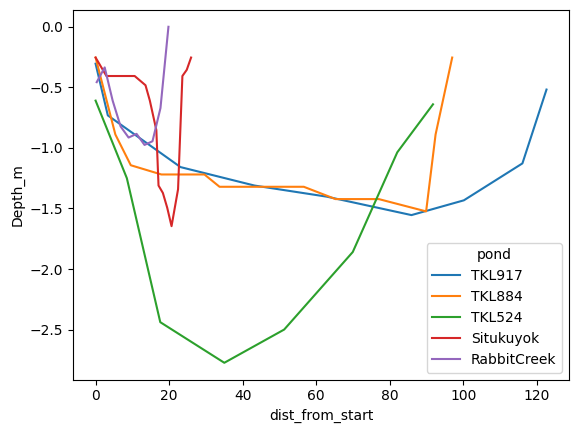

In [5]:
sns.lineplot(data=transect_data, x='dist_from_start', y=transect_data['Depth_m']*-1, hue='pond')

area_lake 7600
cellipt 8
lakeform 1
trib_inflow -9999.
effl_outflow 0
0. 0. 0.
morphometry 9
0.0 7600.0
0.25 7500.0
0.35 7300.0
0.38 7100.0
0.4 7000.0
0.45 6500.0
0.7 6000.0
0.8 5000.0
1.0 1000.0


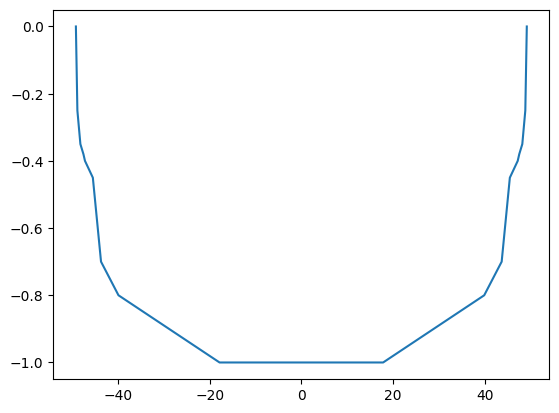

In [6]:
# Rabbit Creek Beaver Pond
area = 7600
ellibse_a = 215
ellibse_b = 25
cellipt = int(ellibse_a/ellibse_b)

depths = np.array([-0., -0.25, -0.35, -0.38, -0.4, -0.45, -0.7, -0.8, -1.0])
areas = np.array([7600.0, 7500.0, 7300.0, 7100.0, 7000.0, 6500.0, 6000.0, 5000.0, 1000.0])

###############################################################################

full_depths_RCBP = np.concatenate([depths,depths[::-1]])
full_areas_RCBP = np.concatenate([-1*np.sqrt(areas/np.pi),np.sqrt(areas/np.pi)[::-1]])

sns.lineplot(x=full_areas_RCBP, y=full_depths_RCBP)

print(f'area_lake {area}')
print(f'cellipt {cellipt}')
print('lakeform 1')
print('trib_inflow -9999.')
print('effl_outflow 0')
print('0. 0. 0.')
print(f'morphometry {len(depths)}')

for i, depth in enumerate(depths):
    print(depth*-1, areas[i])
    

area_lake 1400
cellipt 3
lakeform 1
trib_inflow -9999.
effl_outflow 0
0. 0. 0.
morphometry 9
0.0 1400.0
0.25 1200.0
0.35 900.0
0.45 600.0
0.55 350.0
1.25 100.0
1.5 50.0
1.6 25.0
1.7 10.0


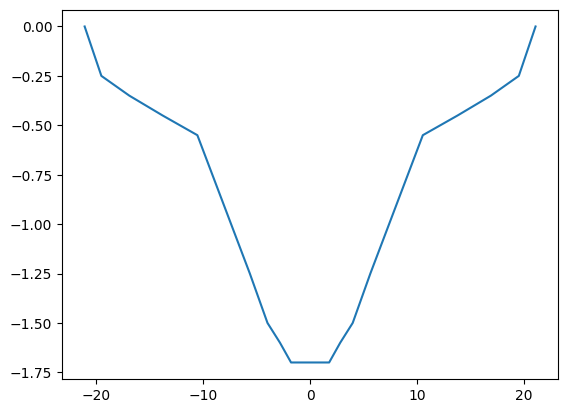

In [7]:
# Situkuyuk Beaver Pond
area = 1400
ellibse_a = 55
ellibse_b = 15
cellipt = int(ellibse_a/ellibse_b)

depths = np.array([-0., -0.25, -0.35, -0.45, -0.55, -1.25, -1.5, -1.6, -1.7])
areas = np.array([1400.0, 1200, 900, 600, 350, 100, 50, 25, 10])

###############################################################################

full_depths_SRBP = np.concatenate([depths,depths[::-1]])
full_areas_SRBP = np.concatenate([-1*np.sqrt(areas/np.pi),np.sqrt(areas/np.pi)[::-1]])

sns.lineplot(x=full_areas_SRBP, y=full_depths_SRBP)

print(f'area_lake {area}')
print(f'cellipt {cellipt}')
print('lakeform 1')
print('trib_inflow -9999.')
print('effl_outflow 0')
print('0. 0. 0.')
print(f'morphometry {len(depths)}')

for i, depth in enumerate(depths):
    print(depth*-1, areas[i])

area_lake 14700.0
cellipt 2
lakeform 1
trib_inflow -9999.
effl_outflow 0
0. 0. 0.
morphometry 10
0.0 14700.0
0.25 13500.0
0.5 11000.0
0.78 8400.0
1.15 7700.0
2.25 4000.0
2.4 3000.0
2.5 2300.0
2.6 1500.0
2.75 400.0


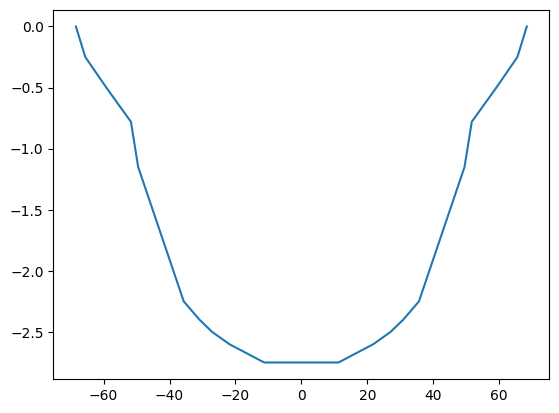

In [8]:
# TKL524
area = 14700.0
ellibse_a = 200
ellibse_b = 80
cellipt = int(ellibse_a/ellibse_b)

depths = np.array([-0., -0.25, -0.5, -0.78, -1.15, -2.25, -2.4, -2.5, -2.6, -2.75])
areas = np.array([14700.0, 13500.0, 11000, 8400, 7700, 4000, 3000, 2300, 1500, 400])

###############################################################################

full_depths_TKL524 = np.concatenate([depths,depths[::-1]])
full_areas_TKL524 = np.concatenate([-1*np.sqrt(areas/np.pi),np.sqrt(areas/np.pi)[::-1]])

sns.lineplot(x=full_areas_TKL524, y=full_depths_TKL524)

print(f'area_lake {area}')
print(f'cellipt {cellipt}')
print('lakeform 1')
print('trib_inflow -9999.')
print('effl_outflow 0')
print('0. 0. 0.')
print(f'morphometry {len(depths)}')

for i, depth in enumerate(depths):
    print(depth*-1, areas[i])

area_lake 16500.0
cellipt 1
lakeform 1
trib_inflow -9999.
effl_outflow 0
0. 0. 0.
morphometry 10
0.0 16500.0
0.25 15000.0
0.4 14000.0
0.75 12000.0
0.9 11500.0
1.25 9000.0
1.44 7000.0
1.46 6000.0
1.48 4000.0
1.5 300.0


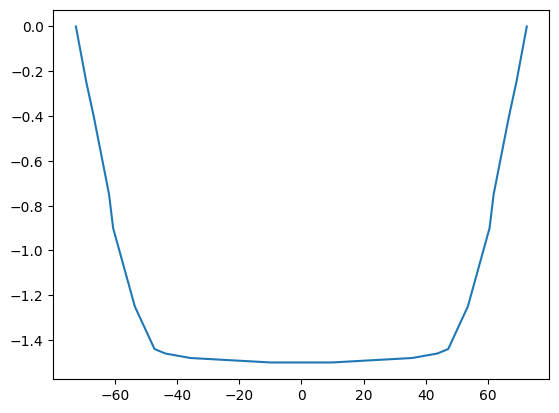

In [ ]:
# TKL884
area = 16500.0
ellibse_a = 120
ellibse_b = 120
cellipt = int(ellibse_a/ellibse_b)

depths = np.array([-0., -0.25, -0.4, -0.7, -0.8, -1.25, -1.44, -1.46, -1.48, -1.5])
areas = np.array([16500.0, 15000.0, 14000, 12000, 11500, 9000, 7000, 6000, 4000, 300])

###############################################################################

full_depths_TKL884 = np.concatenate([depths,depths[::-1]])
full_areas_TKL884 = np.concatenate([-1*np.sqrt(areas/np.pi),np.sqrt(areas/np.pi)[::-1]])

sns.lineplot(x=full_areas_TKL884, y=full_depths_TKL884)

print(f'area_lake {area}')
print(f'cellipt {cellipt}')
print('lakeform 1')
print('trib_inflow -9999.')
print('effl_outflow 0')
print('0. 0. 0.')
print(f'morphometry {len(depths)}')

for i, depth in enumerate(depths):
    print(depth*-1, areas[i])

area_lake 14000
cellipt 1
lakeform 1
trib_inflow -9999.
effl_outflow 0
0. 0. 0.
morphometry 10
0.0 14000.0
0.25 13000.0
0.5 12500.0
0.7 12000.0
0.85 11500.0
1.25 9000.0
1.3 7500.0
1.35 6000.0
1.45 4000.0
1.5 300.0


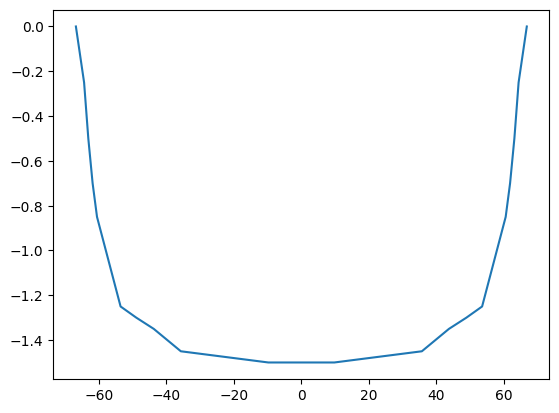

In [15]:
# TKL917
area = 14000
ellibse_a = 120
ellibse_b = 120
cellipt = int(ellibse_a/ellibse_b)

depths = np.array([-0., -0.25, -0.5, -0.7, -0.85, -1.25, -1.3, -1.35, -1.45, -1.5])
areas = np.array([14000, 13000.0, 12500, 12000, 11500, 9000, 7500, 6000, 4000, 300])

###############################################################################

full_depths_TKL917 = np.concatenate([depths,depths[::-1]])
full_areas_TKL917 = np.concatenate([-1*np.sqrt(areas/np.pi),np.sqrt(areas/np.pi)[::-1]])

sns.lineplot(x=full_areas_TKL917, y=full_depths_TKL917)

print(f'area_lake {area}')
print(f'cellipt {cellipt}')
print('lakeform 1')
print('trib_inflow -9999.')
print('effl_outflow 0')
print('0. 0. 0.')
print(f'morphometry {len(depths)}')

for i, depth in enumerate(depths):
    print(depth*-1, areas[i])

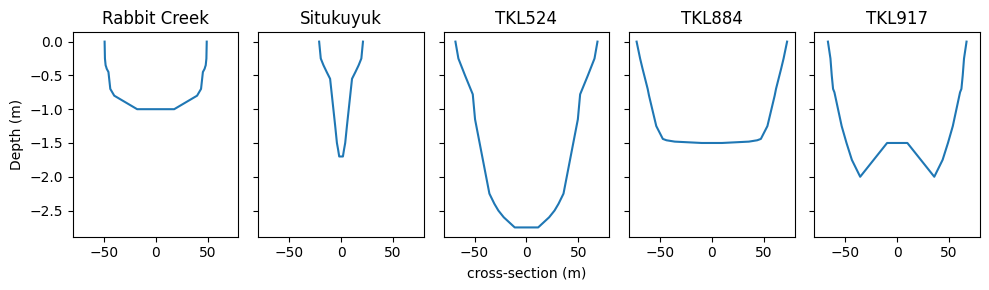

In [11]:
fig, axes=plt.subplots(1,5, figsize=(10,3), sharey=True, sharex=True)

sns.lineplot(x=full_areas_RCBP, y=full_depths_RCBP, ax=axes[0])

sns.lineplot(x=full_areas_SRBP, y=full_depths_SRBP, ax=axes[1])

sns.lineplot(x=full_areas_TKL524, y=full_depths_TKL524, ax=axes[2])

sns.lineplot(x=full_areas_TKL884, y=full_depths_TKL884, ax=axes[3])

sns.lineplot(x=full_areas_TKL917, y=full_depths_TKL917, ax=axes[4])

axes[0].set_title('Rabbit Creek')
axes[1].set_title('Situkuyuk')
axes[2].set_title('TKL524')
axes[3].set_title('TKL884')
axes[4].set_title('TKL917')

axes[0].set_ylabel('Depth (m)')
axes[2].set_xlabel('cross-section (m)')

fig.tight_layout()

plt.savefig('figs/NSF_lake_cross_sections.png', dpi=300)